In [2]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#load csv
df = pd.read_csv('Mall_Customers.csv')

#show dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#change columns name
df = df.rename(columns={'Gender':'gender',
                        'Age':'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#change categorical data to numerical data
df['gender'].replace(['Female','Male'],[0,1], inplace=True)

#show dataframe
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
from sklearn.cluster import KMeans

#remove column CustomerID and gender
x = df.drop(['CustomerID','gender'], axis=1)

#make list cluster
clusters = []

#calculate value inertia for define cluster in kmeans
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

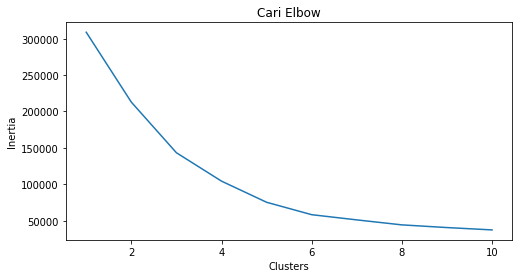

In [12]:
#make plot for inertia
fix, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y = clusters, ax = ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

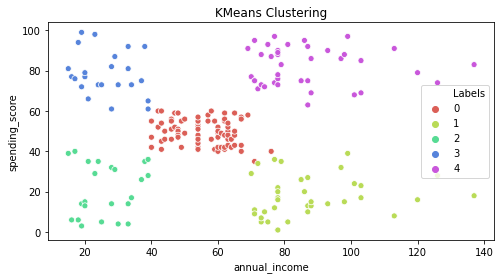

In [14]:
#make cluster from inertia
km5 = KMeans(n_clusters=5).fit(x)

#add column label in dataset
x['Labels'] = km5.labels_

#visualization cluster
plt.figure(figsize=(8,4))
sns.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls',5))
plt.title('KMeans Clustering')
plt.show()